In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.applications import Xception

In [4]:
# train_path="/content/gdrive/My Drive/DataSet/Cleftlip/Train/"
# test_path="/content/gdrive/My Drive/DataSet/Cleftlip/Train/"
# val_path="rps-final-dataset/val"

ben = os.listdir('/content/gdrive/My Drive/DATASET/Train/Cleftlip')
mal = os.listdir('/content/gdrive/My Drive/DATASET/Train/NonCleftlip')
# Let benign be 0 and malignant be 1
train = []
train_y = []
# trainc=[]
# trainnc=[]
for i in ben:
    x = '/content/gdrive/My Drive/DATASET/Train/Cleftlip/' + i
    img = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(200,200))
    img = img/255 # normalising 
    train.append(img.flatten())
    # trainc.append(0)
    train_y.append(0)
for i in mal:
    x = '/content/gdrive/My Drive/DATASET/Train/NonCleftlip/' + i
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(200,200))
    img = img/255 # normalising 
    train.append(img.flatten())
    # trainnc.append(1)
    train_y.append(1)
train = np.array(train)

(array([22., 17.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

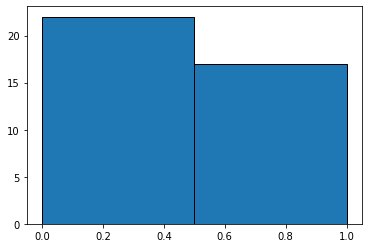

In [5]:

plt.hist(train_y, bins=2, edgecolor='black')

# print(train_y[0].value_counts())
# sns.countplot(train_y[0])
# plt.title("Class Counts")
# plt.show()

# tick_label = ['one', 'two']
# plt.bar(train_y, tick_label = tick_label,
#         width = 0.8, color = ['red', 'green'])
  
# # naming the x-axis
# plt.xlabel('x - axis')
# # naming the y-axis
# plt.ylabel('y - axis')
# # plot title
# plt.title('My bar chart!')
  
# # function to show the plot
# plt.show()

In [6]:
train,val,train_y,val_y = train_test_split(train,train_y,test_size=0.2,random_state=44)
train = train.reshape(train.shape[0],200,200,3)
val = val.reshape(val.shape[0],200,200,3)
encoder = LabelEncoder()
encoder = encoder.fit(train_y)
train_y = encoder.transform(train_y)
encoder = encoder.fit(val_y)
val_y = encoder.transform(val_y)
print(str('training rows ' + str(len(train))))
print(str('validation rows ' + str(len(val))))

training rows 31
validation rows 8


In [7]:
#buliding CNN
model = Sequential()
base = Xception(include_top=False, weights="imagenet", input_shape=(200,200,3), pooling='avg')
for lay in base.layers: lay.trainable = True # false for transfer learning
model.add(base)
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(64,'relu'))
model.add(Dropout(0.6))
model.add(Dense(1,'sigmoid'))
model.compile(Adam(0.0001),'binary_crossentropy',['accuracy'])
model.summary()

83683744/83683744 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                         

In [8]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=2, factor=0.3, min_lr=0.000001)
early_stop = EarlyStopping(patience=4,restore_best_weights=True)

In [13]:
# model.fit(train,train_y,epochs=10,batch_size=10,validation_data=(val,val_y),verbose=2,callbacks=[early_stop,reduce_lr])
model.fit(train,train_y,epochs=10,batch_size=10,validation_data=(val,val_y),verbose=2)

Epoch 1/10
4/4 - 25s - loss: 0.4790 - accuracy: 0.8065 - val_loss: 0.6963 - val_accuracy: 0.6250 - 25s/epoch - 6s/step
Epoch 2/10
4/4 - 25s - loss: 0.4257 - accuracy: 0.8387 - val_loss: 0.7004 - val_accuracy: 0.6250 - 25s/epoch - 6s/step
Epoch 3/10
4/4 - 25s - loss: 0.6752 - accuracy: 0.5161 - val_loss: 0.7077 - val_accuracy: 0.6250 - 25s/epoch - 6s/step
Epoch 4/10
4/4 - 25s - loss: 0.5110 - accuracy: 0.8710 - val_loss: 0.7124 - val_accuracy: 0.6250 - 25s/epoch - 6s/step
Epoch 5/10
4/4 - 24s - loss: 0.4155 - accuracy: 0.8710 - val_loss: 0.7146 - val_accuracy: 0.6250 - 24s/epoch - 6s/step
Epoch 6/10
4/4 - 25s - loss: 0.4847 - accuracy: 0.7742 - val_loss: 0.7173 - val_accuracy: 0.7500 - 25s/epoch - 6s/step
Epoch 7/10
4/4 - 24s - loss: 0.3920 - accuracy: 0.9032 - val_loss: 0.7165 - val_accuracy: 0.5000 - 24s/epoch - 6s/step
Epoch 8/10
4/4 - 24s - loss: 0.5160 - accuracy: 0.7742 - val_loss: 0.7200 - val_accuracy: 0.5000 - 24s/epoch - 6s/step
Epoch 9/10
4/4 - 24s - loss: 0.4556 - accuracy: 

In [14]:
ben = os.listdir('/content/gdrive/My Drive/DATASET/Test/Cleftlip')
mal = os.listdir('/content/gdrive/My Drive/DATASET/Test/NonCleftlip')
test = []
test_y = []
# testc=[]
# testnc=[]
for i in ben:
    x = '/content/gdrive/My Drive/DATASET/Test/Cleftlip/' + i
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(200,200))
    img = img/255 # normalising 
    test.append(img)
    # testc.append(0)
    test_y.append(0)
for i in mal:
    x = '/content/gdrive/My Drive/DATASET/Test/NonCleftlip/' + i
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(200,200))
    img = img/255 # normalising 
    test.append(img)
    # testnc.append(1)
    test_y.append(1)
test = np.array(test)
encoder = LabelEncoder()
c = encoder.fit(test_y)
test_y = encoder.transform(test_y)
loss,acc = model.evaluate(test, test_y,verbose=2)
print('Accuracy on test data: '+ str(acc*100))
print('Loss on test data: ' + str(loss))

1/1 - 4s - loss: 0.5281 - accuracy: 0.8235 - 4s/epoch - 4s/step
Accuracy on test data: 82.35294222831726
Loss on test data: 0.5280996561050415


In [11]:
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import classification_report
# # disp = plot_confusion_matrix(clf, test, test_y, display_labels=['ROCK','MINE'], cmap=plt.cm.Blues)
# # disp.ax_.set_title('Confusion matrix of '+ n)
    
# # y_pred = encoder.predict(test)
# q=encoder.fit_transform(test_y)
# cr = classification_report(test_y, q)
# print("\n\nClassification Report\n")
# print(cr)
# print("---")

In [12]:
# clf_names = []
# train_scores = []
# test_scores = []
# clf_names.append(n)


# clf.fit(X_train, y_train)
# train_scores.append(clf.score(X_train, y_train))
# test_scores.append(clf.score(X_test, y_test))

# print("Accuracy of ",n,":",clf.score(X_test, y_test))

# y_pred = clf.predict(testc)
# from sklearn.metrics import plot_confusion_matrix    
# disp = plot_confusion_matrix('CNN', testc, testnc, display_labels=['ROCK','MINE'], cmap=plt.cm.Blues)
# disp.ax_.set_title('Confusion matrix of CNN')
    

# cr = classification_report(testc, y_pred)
# print("\n\nClassification Report\n")
# print(cr)
# print("---")